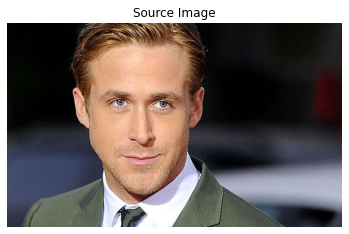

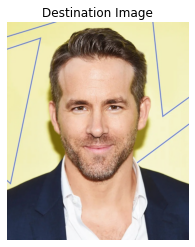

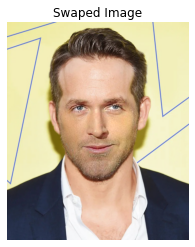

In [13]:
# First we need to import the necessary libraries used for our task.

import cv2                                                #Importing necessary libraries for performing tasks on an Image
import numpy as np
import dlib                                               #Importing dlib for detecting the facial landmarks
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def extract_index_nparray(nparray):                       # After calling the function the value of index is passed to nparray
    
    index = None                                          # If the value of the index is None then it returns the index
    
    for num in nparray[0]:
        index = num                                       # The value at the 0th index of the 'nparray' is stored in the 'index'
                                                          #varible
        break
    return index

#  1. The first step would be importing the Images.


img=cv2.imread(r"C:\Users\CHINMAY\Downloads\actors - Google Search\fd268400-c348-4021-82bb-3d0a1962e257.jpg")           #Importing the source image whose face is to be
                                                                            #extracted
img2=cv2.imread(r"C:\Users\CHINMAY\Downloads\actors - Google Search\image.jpg") #Importing the destination
                                                                                                      #face on which the 
                                                                                                      #source image is tho be
                                                                                                      #superimposed

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)      #converting source and destination images into gray scale images 
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
mask=np.zeros_like(img_gray)                          #creating a black image of same size of the source image 
height,width,channels = img2.shape                    
img2_new_face = np.zeros((height,width,channels),np.uint8) #converting whole image into black





#2.Now after importing the images we have to find facial landmarks.
                                    

detector=dlib.get_frontal_face_detector()                   #dlib function to detect the face in an Image
predictor = dlib.shape_predictor(r"C:\ProgramData\Anaconda3\shape_predictor_68_face_landmarks (1).dat") # Using this to detect
                                                                                                        #the facial landmarks
                                                                                                        #in the image
#Face 1(Source)
faces = detector(img_gray)                                   # Passing the predicted Gray scale(source) image to faces variable. 
for face in faces:
    landmarks = predictor(img_gray, face)                    #passing the gray scale(source) image and the detected face in the
                                                             #image to extract the landmark points using the predictor function
                                                             #and storing those points in landmarks variable.
                                                            
    landmarks_points=[]                                      #creating an empty list called as landmarks_points for further use.
    for n in range(0,68):                                    #As the landmarks predicted by the predictor function are 68 points.
        
        x=landmarks.part(n).x                                # x-coordinate of a landmark point
        
        y=landmarks.part(n).y                                # y-coordinate of the corresponding landmark point 
        
        landmarks_points.append((x,y))                       # appending together the landmark coordinates
        
    points = np.array(landmarks_points,np.int32)             #converting the landmark coordinates into required integer range
                                                             #vales
    
    convexhull = cv2.convexHull(points)                      #Using the convex hull function marking out the boundary of the
                                                             #facial landmarks
    
    cv2.fillConvexPoly(mask,convexhull,255)                  #It plots the inner part of the boundary created by Convex Hull over
                                                             # the mask and the plot is in white color due to 255 specification
    
    volunteer1 = cv2.bitwise_and(img, img, mask=mask)        # The inner part of the image i.e the face plotted due to covex Hull
                                                             # is Bit wise 'AND'ed with the mask.
    

    
#Thus after retrieving the source image we have to superimpose it on the Destination Image,but we cannot do this directly
#as the proportions of the faces may vary due to the differences in the sizes of the faces and allignments of the of the faces.
#Thus to overcome this hurdle we divide the faces into multiple triangles using the landmark points.This process of converting
#faces into sections of triangles is known as Delaunay Triangulation.
    

    
#3.Delaunay Triangulation
    
    
    
    rect = cv2.boundingRect(convexhull)                      # Drawing an approximate rectangle around the Convex Hull Boundary
    
    subdiv = cv2.Subdiv2D(rect)                              # Dividing the rectangle.
    
    subdiv.insert(landmarks_points)                          # Insert the landmarks_points into subdiv
    
    triangles=subdiv.getTriangleList()                       # Returns the list of triangle points in subdiv
    
    tiangles=np.array(triangles,dtype=np.int32)              # Converting the numbers into required integer range

    
    
    
    indexes_triangles = []                                   # Creating a blank list named indexes_triangles for further use.
    
    for t in triangles:                                      
        
        pt1=(t[0],t[1])                                      # X and Y coordinates of 1st point of the triangle.
        
        pt2=(t[2],t[3])                                      # X and Y coordinates of 2nd point of the triangle.
        
        pt3=(t[4],t[5])                                      # X and Y coordinates of 3rd point of the triangle.
        
        
        indexp1=np.where((points==pt1).all(axis=1))          # Retrieving the column value of the landmarks point,where point 1
                                                             # of the triangle is equal to one of the landmarks point.
        
        indexp1=extract_index_nparray(indexp1)               # Calling the 'extract_index_nparray' function and passing the index
                                                             #  point 1 value.
        
        indexp2=np.where((points == pt2).all(axis=1))        # Retrieving the column value of the landmarks point,where point 2
                                                             # of the triangle is equal to one of the landmarks point.
        
        indexp2=extract_index_nparray(indexp2)               # Calling the 'extract_index_nparray' function and passing the index
                                                             # point 2 value.
        
        indexp3=np.where((points==pt3).all(axis=1))          # Retrieving the column value of the landmarks point,where point 3
                                                             # of the triangle is equal to one of the landmarks point.
        
        indexp3=extract_index_nparray(indexp3)               # Calling the 'extract_index_nparray' function and passing the index
                                                             # point 3 value.
               
        
        if indexp1 is not None and indexp2 is not None and indexp3 is not None:      #check whether all the values are not None.
            triangle = [indexp1,indexp2,indexp3]             # Passing the three points of three coordinates to the variable.
            
            indexes_triangles.append(triangle)               # Appending the variable with the predefined 'indexes_triangles'list.
     
        
    
# Face 2(Destination)
faces2= detector(img2_gray)                                  #Passing the predicted Gray scale(Destination) image to 
                                                             #faces2 variable.
for face in faces2:
    landmarks = predictor(img2_gray, face)                   #passing the gray scale(Destination) image and the detected face in 
                                                             #the image to extract the landmark points using the predictor 
                                                             #function and storing those points in landmarks variable.
    
    landmarks_points2=[]                                     #creating an empty list called as landmarks_points for further use.
    
    for n in range(0,68):                                    #As the landmarks predicted by the predictor function are 68 points.
       
        x=landmarks.part(n).x                                # x-coordinate of a landmark point.
        
        y=landmarks.part(n).y                                # y-coordinate of the corresponding landmark point.
        
        landmarks_points2.append((x,y))                      # appending together the landmark coordinates.
    
    
    points2 = np.array(landmarks_points2,np.int32)           #converting the landmark coordinates into required integer range
                                                             #vales.
    
    convexhull2 = cv2.convexHull(points2)                    #Using the convex hull function marking out the boundary of the
                                                             #facial landmarks.
    
        
       
     
        
lines_space_mask = np.zeros_like(img_gray)                    #creating a black image of same size of the source image
lines_space_new_face = np.zeros_like(img2)

 
  #Trianglulation of both face
    
for triangle_index in indexes_triangles:
    
    
    #triangulation of the first face
    tr1_pt1=landmarks_points[triangle_index[0]]               #Passing the points of triangles to variables tr1_pt1,tr1_pt2,tr1_pt3
    tr1_pt2=landmarks_points[triangle_index[1]]
    tr1_pt3=landmarks_points[triangle_index[2]]
    
    triangle1=np.array([tr1_pt1,tr1_pt2,tr1_pt3],np.int32)
    
    rect1=cv2.boundingRect(triangle1)                         # Drawing an approximate rectangle around the Triangle 1 points. 
    
    (x,y,w,h)=rect1                                           
    
    cropped_triangle1=img[y: y+h,x: x+w]                      # Cropping the triangle in the rectangle
    
    #to mask background
    cropped_tr1_mask = np.zeros((h,w),np.uint8)
    
    points = np.array([[tr1_pt1[0] - x,tr1_pt1[1] - y],
                      [tr1_pt2[0] - x,tr1_pt2[1] - y], 
                      [tr1_pt3[0] - x,tr1_pt3[1] - y]],np.int32)
    
    cv2.fillConvexPoly(cropped_tr1_mask, points, 255)         # The cropped triangle with points as 'points2' is filled with 
                                                              # white colour over the 'cropped_tr1_mask'.
    
    
   #triangulation of second face
    tr2_pt1=landmarks_points2[triangle_index[0]]              #Passing the points of triangles to variables tr2_pt1,tr2_pt2,tr2_pt3
    tr2_pt2=landmarks_points2[triangle_index[1]]
    tr2_pt3=landmarks_points2[triangle_index[2]]
    
    triangle2=np.array([tr2_pt1,tr2_pt2,tr2_pt3],np.int32)
    
    rect2=cv2.boundingRect(triangle2)                          # Drawing an approximate rectangle around the Triangle 2 points.
    
    (x,y,w,h)=rect2
    
    cropped_tr2_mask = np.zeros((h,w),np.uint8)
    
    points2 = np.array([[tr2_pt1[0] - x,tr2_pt1[1] - y],
                      [tr2_pt2[0] - x,tr2_pt2[1] - y], 
                      [tr2_pt3[0] - x,tr2_pt3[1] - y]],np.int32)
    
    cv2.fillConvexPoly(cropped_tr2_mask, points2, 255)          # The cropped triangle with points as 'points2' is filled with 
                                                                # white colour over the 'cropped_tr2_mask'.
    
    
    #Now that we have found the Triangulation of both the triangles we have to make the source triangle proportionate to the 
    # destination triangle for this purpose we must warp the triangles.
    
    #warp triangles
    
    points = np.float32(points)
    points2 = np.float32(points2)
    M = cv2.getAffineTransform(points, points2)                 # The Affine Transform is used to make the 'points' proportionated
                                                                # with the 'points2'
    
    warped_triangle = cv2.warpAffine(cropped_triangle1, M, (w, h)) #Now that we have proportionated points we have to draw the
                                                                 #proportionate triangle.
    

    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=cropped_tr2_mask) #Bitwise AND operation with the
                                                                 # 'cropped_tr2_mask'.


    
    
    #reconstruct destination face
    img2_new_face_rect_area = img2_new_face[y: y + h, x: x + w]  
    
    img2_new_face_rect_area_gray = cv2.cvtColor(img2_new_face_rect_area, cv2.COLOR_BGR2GRAY)
    
    _, mask_triangles_designed = cv2.threshold(img2_new_face_rect_area_gray, 1, 255, cv2.THRESH_BINARY_INV) #Removing the 
                                                                                              #background of the triangles.
        
    warped_triangle = cv2.bitwise_and(warped_triangle, warped_triangle, mask=mask_triangles_designed)

    img2_new_face_rect_area = cv2.add(img2_new_face_rect_area, warped_triangle)
    img2_new_face[y: y + h, x: x + w] = img2_new_face_rect_area   #adding individually warped triangles to remove the black space
                                                                  #surrounding the individual warped triangles.
                                                             

# Face swapped (putting 1st face into 2nd face)
img2_face_mask = np.zeros_like(img2_gray)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexhull2, 255) #It plots the inner part of the boundary created by Convex
                                                                      # Hull2 over the 'img2_face_mask' and the plot is in white 
                                                                      # color due to 255 specification
img2_face_mask = cv2.bitwise_not(img2_head_mask)


img2_head_noface = cv2.bitwise_and(img2, img2, mask=img2_face_mask)
result = cv2.add(img2_head_noface, img2_new_face)

(x, y, w, h) = cv2.boundingRect(convexhull2)
center_face2 = (int((x + x + w) / 2), int((y + y + h) / 2))

seamlessclone = cv2.seamlessClone(result, img2, img2_head_mask, center_face2, cv2.NORMAL_CLONE) #Cloning the output in order to 
                                                                                                # get a even toned output.

cv2.imshow("seamlessclone", seamlessclone)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite(r"C:\Users\CHINMAY\Desktop\swap9.png",seamlessclone)
cv2.destroyAllWindows() 




Source = mpimg.imread(r"C:\Users\CHINMAY\Downloads\actors - Google Search\fd268400-c348-4021-82bb-3d0a1962e257.jpg")
Destination = mpimg.imread(r"C:\Users\CHINMAY\Downloads\actors - Google Search\image.jpg")
Swap_Image=mpimg.imread(r"C:\Users\CHINMAY\Desktop\swap9.png")
plt.title("Source Image")
plt.axis("off")
plt.imshow(Source)
plt.show()


plt.title("Destination Image")
plt.axis("off")
plt.imshow(Destination)
plt.show()


plt.title("Swaped Image")
plt.axis("off")
plt.imshow(Swap_Image)
plt.show()